In [1]:
from google.colab import files

uploaded = files.upload()

Saving captain_marvel_reviews.csv to captain_marvel_reviews.csv


In [2]:
import pandas as pd
df = pd.read_csv('captain_marvel_reviews.csv', header=None)
df.columns = ['id', 'title', 'date', 'score', 'review', 'is_english']
df

,id,title,date,score,review,is_english
0,101509,Captain Marvel,2019-03-13,0,Already had low expectation but it still ended...,True
1,101511,Captain Marvel,2019-03-09,5,already love captain marvel because i love str...,True
2,101513,Captain Marvel,2019-03-09,5,"Already saw it\, ready to see it again! Exciti...",True
3,101520,Captain Marvel,2019-04-09,2,"Alright\, here we go.\nSo I'd like to start of...",True
4,101522,Captain Marvel,2019-07-16,1,Alright. Let’s be honest. This movie was horri...,True
...,...,...,...,...,...,...
22161,147249,Captain Marvel,2019-03-10,2,I went in to the movie with low expectations. ...,True
22162,147317,Captain Marvel,2019-04-01,2,I went into this with pretty middle of the roa...,True
22163,147366,Captain Marvel,2019-03-12,4,I went to see CM the day it came out. I had re...,True
22164,147446,Captain Marvel,2019-05-07,2,"I will be honest\, I went and saw this movie t...",True


In [3]:
# Remove unnecessary columns
df = df.drop(columns=['id', 'title', 'date', 'is_english'])
df

,score,review
0,0,Already had low expectation but it still ended...
1,5,already love captain marvel because i love str...
2,5,"Already saw it\, ready to see it again! Exciti..."
3,2,"Alright\, here we go.\nSo I'd like to start of..."
4,1,Alright. Let’s be honest. This movie was horri...
...,...,...
22161,2,I went in to the movie with low expectations. ...
22162,2,I went into this with pretty middle of the roa...
22163,4,I went to see CM the day it came out. I had re...
22164,2,"I will be honest\, I went and saw this movie t..."


In [5]:
# One-hot-encoding process
category = pd.get_dummies(df.score)
df_new = pd.concat([df, category], axis=1)
df_new = df_new.drop(columns='score')
df_new

,review,0,1,2,3,4,5
0,Already had low expectation but it still ended...,1,0,0,0,0,0
1,already love captain marvel because i love str...,0,0,0,0,0,1
2,"Already saw it\, ready to see it again! Exciti...",0,0,0,0,0,1
3,"Alright\, here we go.\nSo I'd like to start of...",0,0,1,0,0,0
4,Alright. Let’s be honest. This movie was horri...,0,1,0,0,0,0
...,...,...,...,...,...,...,...
22161,I went in to the movie with low expectations. ...,0,0,1,0,0,0
22162,I went into this with pretty middle of the roa...,0,0,1,0,0,0
22163,I went to see CM the day it came out. I had re...,0,0,0,0,1,0
22164,"I will be honest\, I went and saw this movie t...",0,0,1,0,0,0


In [6]:
# Preprocessing


# Change to lowercase
sentence = df_new.review[0]
sentence_lower = sentence.lower()

# Remove punctuations
import string
sentence_punc = sentence_lower.translate(str.maketrans("","",string.punctuation))
import re
text_punc = re.sub("[^A-Za-z\s']"," ", sentence_punc)  # remove non-alphabet

# Remove stopwords
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english'))
word_tokens = word_tokenize(text_punc)
sentence_stopwords = ' '.join([word for word in word_tokens if word not in stop_words])

# Make a function
def text_process(text):
  text = text.lower()
  text = re.sub("[^A-Za-z\s']"," ", text)
  word_tokens = word_tokenize(text)
  text = ' '.join([word for word in word_tokens if word not in stop_words])
  return text

# New dataframe
df_new['review_clean'] = df_new['review'].apply(lambda x: text_process(x))
df_new

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,review,0,1,2,3,4,5,review_clean
0,Already had low expectation but it still ended...,1,0,0,0,0,0,already low expectation still ended disappointing
1,already love captain marvel because i love str...,0,0,0,0,0,1,already love captain marvel love stronge femal...
2,"Already saw it\, ready to see it again! Exciti...",0,0,0,0,0,1,already saw ready see exciting great graphics ...
3,"Alright\, here we go.\nSo I'd like to start of...",0,0,1,0,0,0,alright go nso 'd like start n't hater anythin...
4,Alright. Let’s be honest. This movie was horri...,0,1,0,0,0,0,alright let honest movie horrible shocked sinc...
...,...,...,...,...,...,...,...,...
22161,I went in to the movie with low expectations. ...,0,0,1,0,0,0,went movie low expectations controversial comm...
22162,I went into this with pretty middle of the roa...,0,0,1,0,0,0,went pretty middle road expectations based tra...
22163,I went to see CM the day it came out. I had re...,0,0,0,0,1,0,went see cm day came read comments good bad mo...
22164,"I will be honest\, I went and saw this movie t...",0,0,1,0,0,0,honest went saw movie twice really wanted get ...


In [7]:
df_new[['review_clean', 0, 1, 2, 3, 4, 5]]

,review_clean,0,1,2,3,4,5
0,already low expectation still ended disappointing,1,0,0,0,0,0
1,already love captain marvel love stronge femal...,0,0,0,0,0,1
2,already saw ready see exciting great graphics ...,0,0,0,0,0,1
3,alright go nso 'd like start n't hater anythin...,0,0,1,0,0,0
4,alright let honest movie horrible shocked sinc...,0,1,0,0,0,0
...,...,...,...,...,...,...,...
22161,went movie low expectations controversial comm...,0,0,1,0,0,0
22162,went pretty middle road expectations based tra...,0,0,1,0,0,0
22163,went see cm day came read comments good bad mo...,0,0,0,0,1,0
22164,honest went saw movie twice really wanted get ...,0,0,1,0,0,0


In [8]:
# Convert to array
review_clean = df_new['review_clean'].values
label = df_new[[0, 1, 2, 3, 4, 5]].values

In [9]:
label

array([[1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       ...,
       [0, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0]], dtype=uint8)

In [10]:
# Split the folder into train and test sets
from sklearn.model_selection import train_test_split
review_clean_train, review_clean_test, label_train, label_test = train_test_split(review_clean, label, test_size=0.2)

In [11]:
# Use tokenizer 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(review_clean_train)
tokenizer.fit_on_texts(review_clean_test)

seq_train = tokenizer.texts_to_sequences(review_clean_train)
seq_test = tokenizer.texts_to_sequences(review_clean_test)

padded_train = pad_sequences(seq_train)
padded_test = pad_sequences(seq_test)

In [12]:
# Make the model
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

# Compile the model
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [13]:
num_epochs = 30
history = model.fit(padded_train, label_train, epochs=num_epochs,
                    validation_data=(padded_test, label_test), verbose=2)

Epoch 1/30
555/555 - 247s - loss: 1.4104 - accuracy: 0.4124 - val_loss: 1.2534 - val_accuracy: 0.4813 - 247s/epoch - 446ms/step
Epoch 2/30
555/555 - 248s - loss: 1.1255 - accuracy: 0.5337 - val_loss: 1.1576 - val_accuracy: 0.5207 - 248s/epoch - 447ms/step
Epoch 3/30
555/555 - 252s - loss: 1.0245 - accuracy: 0.5778 - val_loss: 1.1457 - val_accuracy: 0.5329 - 252s/epoch - 454ms/step
Epoch 4/30
555/555 - 250s - loss: 0.9705 - accuracy: 0.6051 - val_loss: 1.1739 - val_accuracy: 0.5343 - 250s/epoch - 451ms/step
Epoch 5/30
555/555 - 246s - loss: 0.9320 - accuracy: 0.6226 - val_loss: 1.2018 - val_accuracy: 0.5302 - 246s/epoch - 444ms/step
Epoch 6/30
555/555 - 253s - loss: 0.9014 - accuracy: 0.6357 - val_loss: 1.1999 - val_accuracy: 0.5277 - 253s/epoch - 455ms/step
Epoch 7/30
555/555 - 254s - loss: 0.8686 - accuracy: 0.6550 - val_loss: 1.2584 - val_accuracy: 0.5167 - 254s/epoch - 458ms/step
Epoch 8/30
555/555 - 256s - loss: 0.8295 - accuracy: 0.6704 - val_loss: 1.2767 - val_accuracy: 0.5210 - 

In [ ]:
'''
OPTIONAL! CHOOSE ONE ONLY (this cell or the previous one)!

'''

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9):
      print("\nAccuracy has reached >90%!")
      self.model.stop_training = True

callbacks = myCallback()

history = model.fit(padded_train, label_train, epochs=20, callbacks=[callbacks],
                    validation_data=(padded_test, label_test), verbose=2))

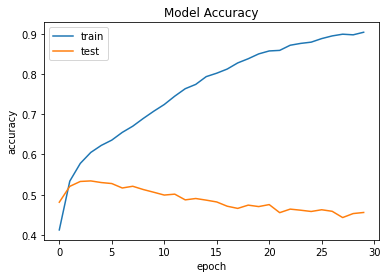

In [14]:
# Plot the accuracy of the model
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

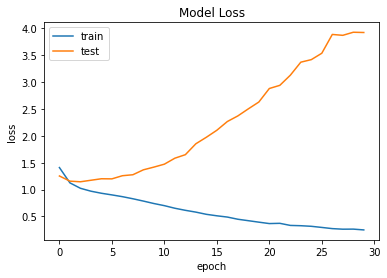

In [15]:
# Plot the loss of the model
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()